In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
df= pd.read_csv("video_games_sales.csv")

In [49]:
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [51]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [52]:
df.nunique()

Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            96
User_Count           888
Developer           1696
Rating                 8
dtype: int64

In [53]:
df.head(2)

Name Platform  Year_of_Release     Genre Publisher  NA_Sales  \
0         Wii Sports      Wii           2006.0    Sports  Nintendo     41.36   
1  Super Mario Bros.      NES           1985.0  Platform  Nintendo     29.08   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
0     28.96      3.77         8.45         82.53          76.0          51.0   
1      3.58      6.81         0.77         40.24           NaN           NaN   

  User_Score  User_Count Developer Rating  
0          8       322.0  Nintendo      E  
1        NaN         NaN       NaN    NaN

In [54]:
df.shape

(16719, 16)

In [55]:
df= df[df["Rating"].notna()]

In [56]:
df.isnull().sum()

Name                  0
Platform              0
Year_of_Release     181
Genre                 0
Publisher             7
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       1896
Critic_Count       1896
User_Score           71
User_Count         2446
Developer             0
Rating                0
dtype: int64

In [57]:
df["Year_of_Release"].value_counts()

2009.0    1011
2008.0     981
2007.0     821
2010.0     799
2005.0     706
2011.0     703
2006.0     678
2002.0     655
2003.0     613
2004.0     598
2012.0     355
2014.0     345
2001.0     339
2013.0     316
2015.0     315
2016.0     280
2000.0     148
1999.0      42
1998.0      32
1997.0      19
1996.0       7
1992.0       2
1994.0       1
1985.0       1
2020.0       1
1988.0       1
Name: Year_of_Release, dtype: int64

In [58]:
df= df[df["Critic_Score"].notna()]
df= df[df["Critic_Count"].notna()]
df= df[df["User_Count"].notna()]

In [59]:
df.isnull().sum()

Name                 0
Platform             0
Year_of_Release    121
Genre                0
Publisher            4
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score         0
Critic_Count         0
User_Score           0
User_Count           0
Developer            0
Rating               0
dtype: int64

In [60]:
df["Year_of_Release"].fillna(2009.0, inplace= True)
df["Publisher"].fillna("Electronic Arts", inplace= True)

In [61]:
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [62]:
df.shape

(6947, 16)

<AxesSubplot:>

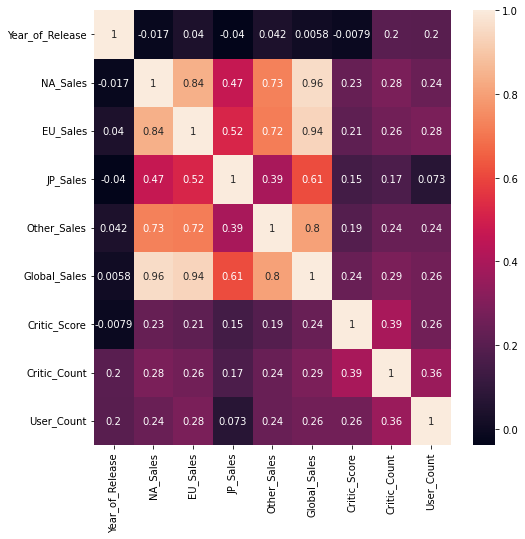

In [63]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

In [64]:
df.head(2)

Name Platform  Year_of_Release   Genre Publisher  NA_Sales  \
0      Wii Sports      Wii           2006.0  Sports  Nintendo     41.36   
2  Mario Kart Wii      Wii           2008.0  Racing  Nintendo     15.68   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
0     28.96      3.77         8.45         82.53          76.0          51.0   
2     12.76      3.79         3.29         35.52          82.0          73.0   

  User_Score  User_Count Developer Rating  
0          8       322.0  Nintendo      E  
2        8.3       709.0  Nintendo      E

In [65]:
df=df.drop(["Global_Sales"], axis=1)

In [66]:
df["Platform"].value_counts()

PS2     1161
X360     877
PS3      783
PC       667
XB       580
Wii      491
DS       468
PSP      393
GC       356
GBA      241
PS4      239
XOne     159
3DS      157
PS       153
PSV      119
WiiU      89
DC        14
Name: Platform, dtype: int64

In [67]:
def platform(x):
    if x=="PS2":
        return "PS2"
    elif x=="X360":
        return "X360"
    elif x== "PS3":
        return "PS3"
    elif x== "PC":
        return "PC"
    else:
        return "other_console"
df["platform_new"]=df["Platform"].map(platform)
    

In [68]:
df.head()

Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii           2006.0    Sports  Nintendo   
2         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
3      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
6  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
7               Wii Play      Wii           2006.0      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Critic_Score  Critic_Count  \
0     41.36     28.96      3.77         8.45          76.0          51.0   
2     15.68     12.76      3.79         3.29          82.0          73.0   
3     15.61     10.93      3.28         2.95          80.0          73.0   
6     11.28      9.14      6.50         2.88          89.0          65.0   
7     13.96      9.18      2.93         2.84          58.0          41.0   

  User_Score  User_Count Developer Rating   platform_new  
0          8       322.0  Nintendo      E  other_console  
2        8.3       709.0  Nintendo      E  other_console  
3          8       192.0  Nintendo      E  other_console  
6        8.5       431.0  Nintendo      E  other_console  
7        6.6       129.0  Nintendo      E  other_console

In [69]:
df["Genre"].value_counts()

Action          1663
Sports           965
Shooter          882
Role-Playing     718
Racing           591
Platform         407
Misc             394
Fighting         382
Simulation       301
Strategy         274
Adventure        249
Puzzle           121
Name: Genre, dtype: int64

In [70]:
Developers_list = dict(df['Developer'].value_counts())

print(Developers_list)

{'EA Canada': 152, 'EA Sports': 145, 'Capcom': 128, 'Ubisoft': 104, 'Konami': 98, 'Ubisoft Montreal': 88, 'EA Tiburon': 86, 'Omega Force': 69, 'Visual Concepts': 68, 'Electronic Arts': 68, 'Nintendo': 68, "Traveller's Tales": 68, 'Vicarious Visions': 59, 'Codemasters': 58, 'Namco': 55, "Yuke's": 48, 'Midway': 44, 'TT Games': 43, 'Neversoft Entertainment': 43, 'Treyarch': 42, 'Maxis': 42, 'From Software': 41, 'Eurocom Entertainment Software': 40, 'Square Enix': 40, 'Sonic Team': 36, 'Radical Entertainment': 34, 'TOSE': 34, 'Arc System Works': 32, 'Harmonix Music Systems': 32, 'Sega': 32, 'Artificial Mind and Movement': 32, 'High Voltage Software': 31, 'Rebellion': 30, 'Koei': 27, 'Gearbox Software': 27, 'Climax Group': 26, 'Acclaim': 25, 'KCET': 25, 'SCEA San Diego Studios': 25, 'Rainbow Studios': 25, 'Criterion Games': 24, 'Krome Studios': 24, 'EA Games': 24, 'EA DICE': 24, 'Griptonite Games': 23, 'Ubisoft Shanghai': 23, 'Nippon Ichi Software': 22, 'CyberConnect2': 22, 'BioWare': 22, '

In [71]:
def developer(x):
  if x.find('EA') >= 0 or x.find('Electronic Arts') >= 0:
    return 'EA'
  elif x.find('Capcom') >= 0:
    return 'Capcom'
  elif x.find('Ubisoft') >= 0:
    return 'Ubisoft'
  elif x.find('Konami') >= 0:
    return 'Komani'
  elif x.find('Nitendo') >= 0:
    return 'Nitendo'
  else:
    return 'other_dev'


df['Developer_new'] = df['Developer'].map(developer)

df.head(1)

Name Platform  Year_of_Release   Genre Publisher  NA_Sales  EU_Sales  \
0  Wii Sports      Wii           2006.0  Sports  Nintendo     41.36     28.96   

   JP_Sales  Other_Sales  Critic_Score  Critic_Count User_Score  User_Count  \
0      3.77         8.45          76.0          51.0          8       322.0   

  Developer Rating   platform_new Developer_new  
0  Nintendo      E  other_console     other_dev

In [72]:
df['Rating'].value_counts()

T       2420
E       2118
M       1459
E10+     946
RP         2
AO         1
K-A        1
Name: Rating, dtype: int64

In [73]:
def rating(x):
  if x == 'T':
    return 'T'
  elif x == 'E':
    return 'E'
  elif x == 'M':
    return 'M'
  elif x == 'E10+':
    return 'E10+'
  else:
    return 'other_rating'

df['Rating_new'] = df['Rating'].map(rating)
df.head(1)

Name Platform  Year_of_Release   Genre Publisher  NA_Sales  EU_Sales  \
0  Wii Sports      Wii           2006.0  Sports  Nintendo     41.36     28.96   

   JP_Sales  Other_Sales  Critic_Score  Critic_Count User_Score  User_Count  \
0      3.77         8.45          76.0          51.0          8       322.0   

  Developer Rating   platform_new Developer_new Rating_new  
0  Nintendo      E  other_console     other_dev          E

In [74]:
pub = dict(df['Publisher'].value_counts())

print(pub)

{'Electronic Arts': 960, 'Activision': 498, 'Ubisoft': 498, 'Sony Computer Entertainment': 316, 'THQ': 309, 'Nintendo': 292, 'Sega': 288, 'Take-Two Interactive': 274, 'Konami Digital Entertainment': 248, 'Namco Bandai Games': 241, 'Capcom': 200, 'Atari': 179, 'Microsoft Game Studios': 141, 'Warner Bros. Interactive Entertainment': 139, 'Tecmo Koei': 137, 'Square Enix': 135, 'Eidos Interactive': 125, 'Vivendi Games': 116, 'Codemasters': 113, 'Midway Games': 105, '505 Games': 80, 'Deep Silver': 77, 'Disney Interactive Studios': 75, 'LucasArts': 71, 'Unknown': 67, 'Acclaim Entertainment': 66, 'Nippon Ichi Software': 61, 'Rising Star Games': 52, 'Bethesda Softworks': 48, 'D3Publisher': 36, 'Focus Home Interactive': 31, 'Ignition Entertainment': 30, 'Empire Interactive': 28, 'Atlus': 25, 'Kalypso Media': 24, 'Zoo Digital Publishing': 24, 'Majesco Entertainment': 23, 'PQube': 22, 'TDK Mediactive': 21, 'SouthPeak Games': 21, 'Global Star': 20, 'Universal Interactive': 19, 'Virgin Interactive'

In [75]:
def publisher(x):
  if x == 'Electronic Arts':
    return 'Electronic Arts'
  elif x == 'Activision':
    return 'Activision'
  elif x == 'Ubisoft':
    return 'Ubisoft'
  elif x == 'Sony Computer Entertainment':
    return 'Sony Computer Entertainment'
  elif x == 'Nintendo':
    return 'Nintendo'
  elif x == 'Konami Digital Entertainment':
    return 'Konami Digital Entertainment'
  else:
    return 'other_publisher'

df['Publisher_new'] = df['Publisher'].map(publisher)

df.head(1)

Name Platform  Year_of_Release   Genre Publisher  NA_Sales  EU_Sales  \
0  Wii Sports      Wii           2006.0  Sports  Nintendo     41.36     28.96   

   JP_Sales  Other_Sales  Critic_Score  Critic_Count User_Score  User_Count  \
0      3.77         8.45          76.0          51.0          8       322.0   

  Developer Rating   platform_new Developer_new Rating_new Publisher_new  
0  Nintendo      E  other_console     other_dev          E      Nintendo

In [76]:
df=df.drop(['Platform', 'Genre', 'Publisher', 'User_Score', 'Developer', 'Rating', 'Name'],axis=1)

In [77]:
df.head()

Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Critic_Score  \
0           2006.0     41.36     28.96      3.77         8.45          76.0   
2           2008.0     15.68     12.76      3.79         3.29          82.0   
3           2009.0     15.61     10.93      3.28         2.95          80.0   
6           2006.0     11.28      9.14      6.50         2.88          89.0   
7           2006.0     13.96      9.18      2.93         2.84          58.0   

   Critic_Count  User_Count   platform_new Developer_new Rating_new  \
0          51.0       322.0  other_console     other_dev          E   
2          73.0       709.0  other_console     other_dev          E   
3          73.0       192.0  other_console     other_dev          E   
6          65.0       431.0  other_console     other_dev          E   
7          41.0       129.0  other_console     other_dev          E   

  Publisher_new  
0      Nintendo  
2      Nintendo  
3      Nintendo  
6      Nintendo  
7      Nintendo

In [78]:
plat_new = pd.get_dummies(df['platform_new'])
dev_new = pd.get_dummies(df['Developer_new'])
rat_new = pd.get_dummies(df['Rating_new'])
pub_new = pd.get_dummies(df['Publisher_new'])


In [79]:
df = pd.concat([df, plat_new, dev_new, rat_new, pub_new], axis = 1)

In [80]:
df = df.drop(['platform_new', 'Developer_new', 'Rating_new', 'Publisher_new'], axis = 1) 

In [81]:
df.head()

Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Critic_Score  \
0           2006.0     41.36     28.96      3.77         8.45          76.0   
2           2008.0     15.68     12.76      3.79         3.29          82.0   
3           2009.0     15.61     10.93      3.28         2.95          80.0   
6           2006.0     11.28      9.14      6.50         2.88          89.0   
7           2006.0     13.96      9.18      2.93         2.84          58.0   

   Critic_Count  User_Count  PC  PS2  ...  M  T  other_rating  Activision  \
0          51.0       322.0   0    0  ...  0  0             0           0   
2          73.0       709.0   0    0  ...  0  0             0           0   
3          73.0       192.0   0    0  ...  0  0             0           0   
6          65.0       431.0   0    0  ...  0  0             0           0   
7          41.0       129.0   0    0  ...  0  0             0           0   

   Electronic Arts  Konami Digital Entertainment  Nintendo  \
0                0                             0         1   
2                0                             0         1   
3                0                             0         1   
6                0                             0         1   
7                0                             0         1   

   Sony Computer Entertainment  Ubisoft  other_publisher  
0                            0        0                0  
2                            0        0                0  
3                            0        0                0  
6                            0        0                0  
7                            0        0                0  

[5 rows x 30 columns]

In [82]:
y = df['Other_Sales']
X= df.drop(['Other_Sales'], axis = 1) 

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
reg = LinearRegression()
model = reg.fit(X_train, y_train)

In [89]:
print(reg.score(X_train, y_train))

0.6160757745300647


In [90]:
pred = reg.predict(X_test)

r2_score = reg.score(X_test,y_test)
print(r2_score)

0.4922452454370776
